# Project

This is a kaggle supermarket sales dataset.
I am using that to practice data analysis with python and Kaggle's Grandmaster way of analysis

# Project name: Supermarket sales analysis and visualization

# Business understanding

No detailed information about the business was provided on Kaggle. However, since this is a supermarket dataset, this project will showcase key performance indicators (KPIs) and analyses relevant to this type of company, along with insights and recommendations for potential improvements.

# Objective:

Evaluate the company's overall performance by analyzing key revenue, customer, operational, and marketing KPIs. 
The goal is to identify areas of strength and uncover opportunities for growth and improvement.

# Data understanding

## Importing libraries and Dataset

In [432]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [433]:
df = pd.read_csv(f'supermarket_sales.csv')

## Understanding features, columns and data quality

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

The "Date" and "Time" columns are currently stored as an object type and needs to be converted to a proper datetime format for accurate and efficient analysis.
In this case, "Date" was converted into index column and "Time" to time.

In [435]:
df.set_index('Date',inplace =True)

In [436]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1/5/2019 to 2/18/2019
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income     

In [438]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [439]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [440]:
df.duplicated().sum()

np.int64(0)

In [441]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
1/5/2019,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
3/8/2019,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29:00,Cash,76.40,4.761905,3.8200,9.6
3/3/2019,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
1/27/2019,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
2/8/2019,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [442]:
print(f'\nNumber of unique values on each column\n')
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')


Number of unique values on each column

Invoice ID - 1000
Branch - 3
City - 3
Customer type - 2
Gender - 2
Product line - 6
Unit price - 943
Quantity - 10
Tax 5% - 990
Total - 990
Time - 506
Payment - 3
cogs - 990
gross margin percentage - 1
gross income - 990
Rating - 61


In [443]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [444]:
sales_gender = df.groupby('City')['Total'].sum()
sales_gender


City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

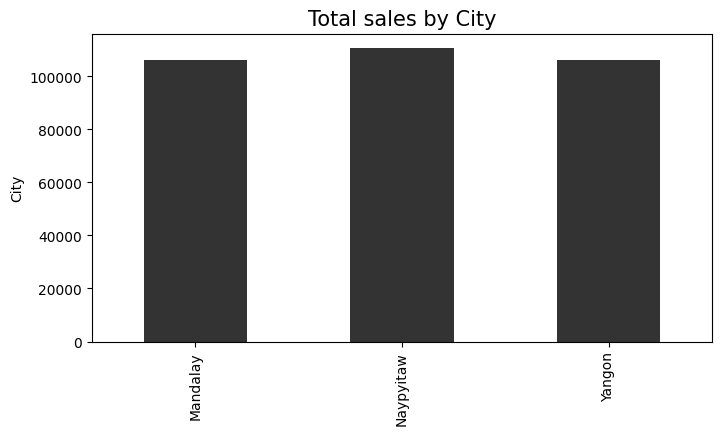

In [445]:
sales_gender = df.groupby('City')['Total'].sum()
sales_gender.plot(kind='bar', figsize=(8, 4), color='#333333', legend=False)
plt.xlabel(None)
plt.ylabel('City')
plt.title('Total sales by City',fontsize=15)
plt.show()

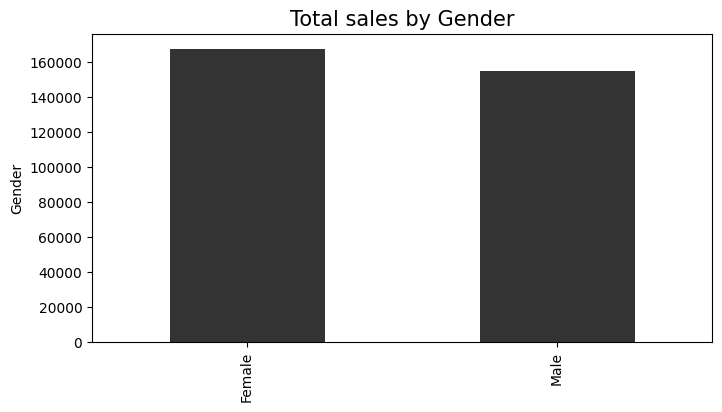

In [446]:
sales_gender = df.groupby('Gender')['Total'].sum()
sales_gender.plot(kind='bar', figsize=(8, 4), color='#333333', legend=False)
plt.xlabel(None)
plt.ylabel('Gender')
plt.title('Total sales by Gender',fontsize=15)
plt.show()

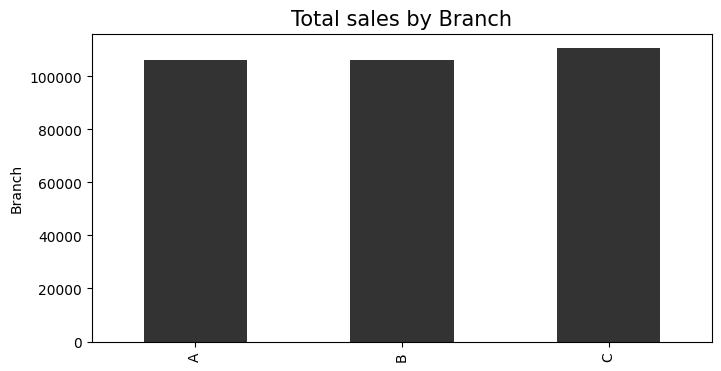

In [447]:
sales_gender = df.groupby('Branch')['Total'].sum()
sales_gender.plot(kind='bar', figsize=(8, 4), color='#333333', legend=False)
plt.xlabel(None)
plt.ylabel('Branch')
plt.title('Total sales by Branch',fontsize=15)
plt.show()

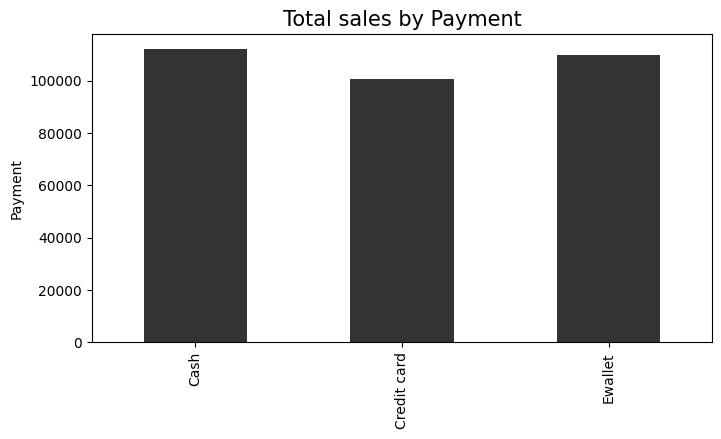

In [448]:
sales_payment = df.groupby('Payment')['Total'].sum()
sales_payment.plot(kind='bar', figsize=(8, 4), color='#333333', legend=False)
plt.xlabel(None)
plt.ylabel('Payment')
plt.title('Total sales by Payment',fontsize=15)
plt.show()

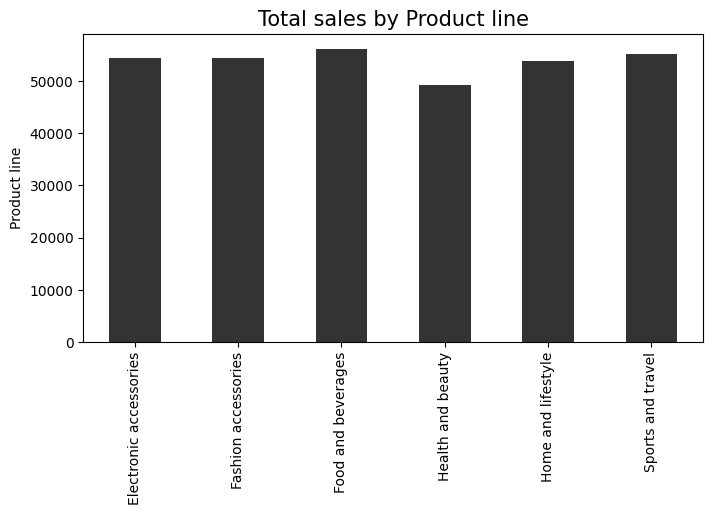

In [449]:
sales_product_line = df.groupby('Product line')['Total'].sum()
sales_product_line.plot(kind='bar', figsize=(8, 4), color='#333333', legend=False)
plt.xlabel(None)
plt.ylabel('Product line')
plt.title('Total sales by Product line',fontsize=15)
plt.show()

In [450]:
non_numeric_columns = df.select_dtypes(exclude=['float64','int64']).columns
non_numeric_columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Time', 'Payment'],
      dtype='object')

In [451]:
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')


correlation_matrix = df.corr()

# Optionally, you can handle NaN values if any
# For example, you can drop rows or columns with NaN values
correlation_matrix.dropna(inplace=True)  # Drop rows with NaN values
correlation_matrix.dropna(axis=1, inplace=True)  # Drop columns with NaN values

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


In [452]:
df.corr()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Branch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit price,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.010778,0.633962,0.633962,NaN,NaN,0.633962,NaN,0.633962,-0.008778
Quantity,NaN,NaN,NaN,NaN,NaN,NaN,0.010778,1.000000,0.705510,0.705510,NaN,NaN,0.705510,NaN,0.705510,-0.015815
Tax 5%,NaN,NaN,NaN,NaN,NaN,NaN,0.633962,0.705510,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.000000,-0.036442
Total,NaN,NaN,NaN,NaN,NaN,NaN,0.633962,0.705510,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.000000,-0.036442


# Exploratory Data Analysis

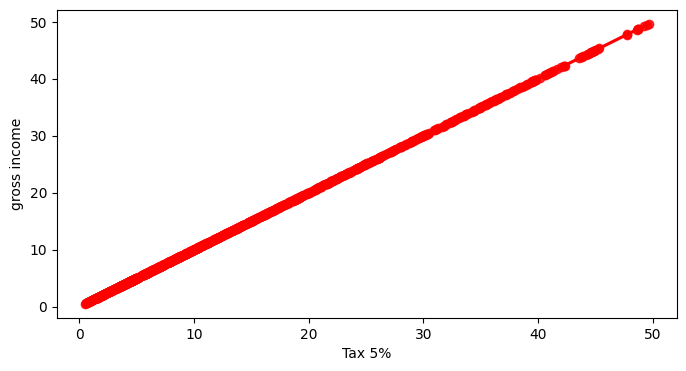

In [453]:
plt.figure(figsize=(8,4),dpi=100)
sns.regplot(x='Tax 5%', y='gross income',data=df,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('gross income')
plt.show()

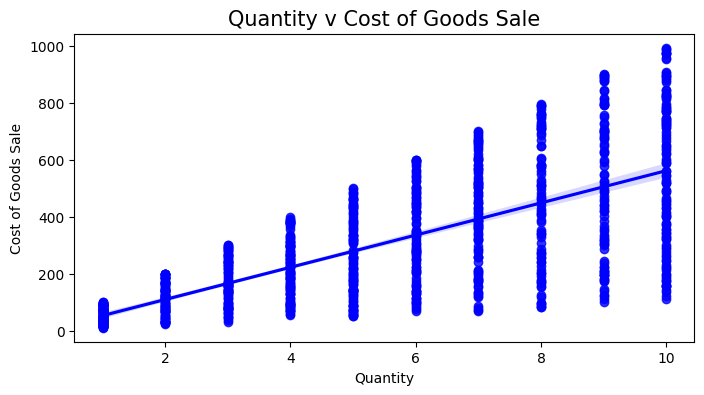

In [454]:
plt.figure(figsize=(8,4),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=df,color='blue')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

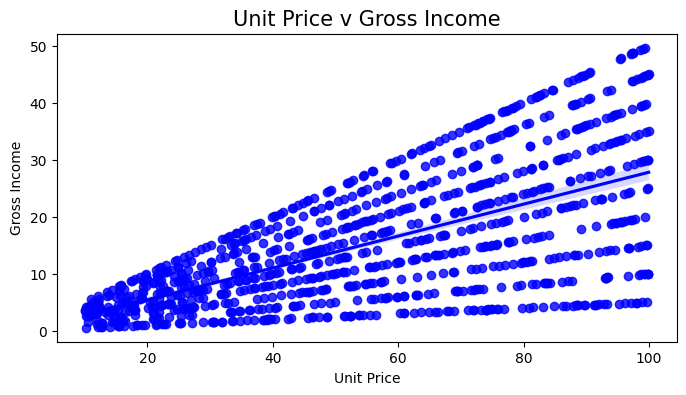

In [455]:
plt.figure(figsize=(8,4),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=df,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

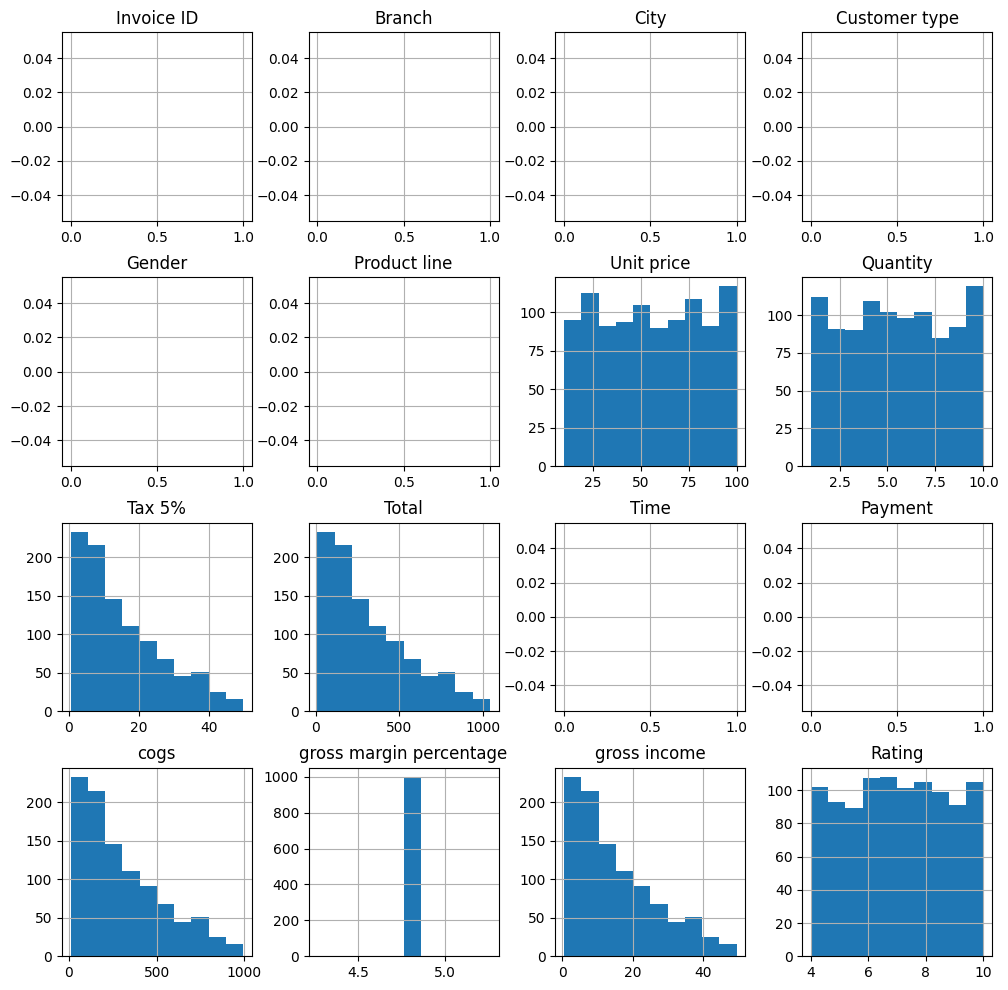

In [456]:
df.hist(figsize=(12,12))
plt.show()

In [457]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
1/5/2019,NaN,NaN,NaN,NaN,NaN,NaN,74.69,7,26.1415,548.9715,NaN,NaN,522.83,4.761905,26.1415,9.1
3/8/2019,NaN,NaN,NaN,NaN,NaN,NaN,15.28,5,3.8200,80.2200,NaN,NaN,76.40,4.761905,3.8200,9.6
3/3/2019,NaN,NaN,NaN,NaN,NaN,NaN,46.33,7,16.2155,340.5255,NaN,NaN,324.31,4.761905,16.2155,7.4
1/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,58.22,8,23.2880,489.0480,NaN,NaN,465.76,4.761905,23.2880,8.4
2/8/2019,NaN,NaN,NaN,NaN,NaN,NaN,86.31,7,30.2085,634.3785,NaN,NaN,604.17,4.761905,30.2085,5.3
